In [1]:
!python --version

Python 3.8.17


Test notebook to try out the Amazon SageMaker Studio. Lets get a submission to the Spaceship Titatic Kaggle competition.

Lets get the basic data loaded

In [2]:
!pip install kaggle

Lets get the Kaggle token installed. Manually move the kaggle jason file to the root .kaggle folder.

Lets download the data

In [3]:
!kaggle competitions download -c spaceship-titanic

spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


Now to unzip it.

In [4]:
# !unzip ./spaceship-titanic.zip

Cool. Lets get the basic data into a dataframe.

In [2]:
import pandas as pd
import numpy as np
tdata = pd.read_csv('train.csv')

In [3]:
tdata.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Lets get some basic summary statistics going.

In [7]:
tdata.describe(include = 'all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


Lets check for missing values

In [8]:
tdata.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
tdata.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Turns out this is not really needed.

<!-- Ok so we now need to convert some of these 'objects' to boolean to ensure it plays nicely with FastAI. -->

In [10]:
tdata['VIP']=tdata['VIP'].astype('bool')
tdata['CryoSleep']=tdata['CryoSleep'].astype('bool')

Note: We are basically making the assumption that NA values are 0.

In [11]:
tdata.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
tdata.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Again not really needed.

<!-- We basically now need to turns all the bool into uint8 to fix an error with FastAi code. -->

In [13]:
# # workaround for fastai/pytorch bug where bool is treated as object and thus erroring out.
# for n in tdata:
#     if pd.api.types.is_bool_dtype(tdata[n]):
#         tdata[n] = tdata[n].astype('uint8')

In [14]:
tdata.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

### H3 Feature Engineering

Lets get some basic feature engineering going.

First up, lets get the cabin sorted out into decks, cabin numbers and side of the ship.

In [26]:
tdata['Cabin'][:10]

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
5    F/0/P
6    F/2/S
7    G/0/S
8    F/3/S
9    B/1/P
Name: Cabin, dtype: object

In [11]:
tdata[['Cabin_Deck', 'Cabin_number', 'Cabin_side']] = tdata['Cabin'].str.split('/',expand=True)

Alright, lets get Passenger group sorted. I think we need to get this into two columns. Group_size and # of Family.

In [41]:
# tdata['PassengerId'].str.split('_',expand=True).iloc[:4,0]
tdata[['PassengerID_Group','PassengerID_Number']]=tdata['PassengerId'].str.split('_',expand=True)

In [56]:

def get_party_size(grp):
    ans = []
    for grp_id in grp:
        ans.append(len(tdata.loc[tdata['PassengerID_Group'] == grp_id]))
    return ans

tdata['PassengerID_GroupSize'] = get_party_size(tdata['PassengerID_Group'])

In [57]:
tdata.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0001,01,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,0002,01,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,0003,01,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,0003,02,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,0004,01,1


Cool. Lets get a basic linear regression model going.

In [58]:
cat_vars = list(tdata.select_dtypes(['object','bool']).columns)
cat_vars.remove('Name')
cat_vars.remove('PassengerId')
cat_vars.remove('Transported')
cat_vars.remove('Cabin')
cat_vars.remove('PassengerID_Group')
cat_vars.remove('PassengerID_Number')
print(cat_vars)

cont_vars = list(tdata.select_dtypes(['int','float']).columns)
print(cont_vars)

not_used_vars = ['Name','PassengerId', 'Cabin', 'PassengerID_Group', 'PassengerID_Number']
print(not_used_vars)

total_columns = len(cont_vars)+len(cat_vars)+len(not_used_vars)
print(total_columns)
tdata.shape

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck', 'Cabin_number', 'Cabin_side']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'PassengerID_GroupSize']
['Name', 'PassengerId', 'Cabin', 'PassengerID_Group', 'PassengerID_Number']
19


(8693, 20)

In [59]:
tdata['Transported'].dtype
# dep_vars = list(tdata.select_dtypes('bool').columns)
dep_vars = ['Transported']
print(dep_vars)

['Transported']


In [17]:
# !pip install fastai
# !conda install -c fastchan fastai

In [60]:
from fastai.tabular.all import *

Lets get all the basic column names into variables. This will come in handy later.

Lets get a basic tabular pandas model going.

In [19]:
# for n in tdata:
#     if pd.api.types.is_object_dtype(tdata[n]):
#         tdata[n] = tdata[n].astype('category')

Critical error here!! Make sure you dont pass in strings!! You are trying to pass in the actual objects!!

In [61]:
procs = [Categorify, FillMissing, Normalize]

In [62]:
splits = RandomSplitter(valid_pct=0.2)(tdata)

In [63]:
to = TabularPandas(tdata,splits = splits, do_setup=True, procs = procs,
                   cat_names = cat_vars, cont_names = cont_vars,
                   y_names = dep_vars, y_block = RegressionBlock())
to.show()

,HomePlanet,CryoSleep,Destination,VIP,Cabin_Deck,Cabin_number,Cabin_side,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerID_GroupSize,Transported
2482,Mars,False,55 Cancri e,False,F,551,P,True,False,False,False,False,False,27.0,1722.0,4.0,937.0,0.0,0.0,1.0,False
6371,Earth,False,TRAPPIST-1e,False,G,1097,S,False,False,False,False,False,False,44.0,0.0,714.0,174.0,0.0,0.0,1.0,True
3813,Earth,True,TRAPPIST-1e,False,G,671,S,False,False,False,True,False,False,60.0,0.0,0.0,0.0,0.0,0.0,1.0,True
336,Europa,False,55 Cancri e,False,B,11,S,False,False,False,False,False,False,18.0,17.0,215.0,4.0,5132.0,697.0,7.0,False
3240,Earth,False,PSO J318.5-22,False,F,718,P,False,False,False,False,False,False,62.0,3.0,0.0,2908.0,0.0,0.0,2.0,True
5666,Earth,False,55 Cancri e,False,F,1242,P,False,False,False,False,True,False,34.0,0.0,968.0,273.0,0.0,283.0,7.0,False
3667,Mars,True,TRAPPIST-1e,False,F,743,S,False,False,False,False,False,False,12.0,0.0,0.0,0.0,0.0,0.0,3.0,True
6725,Earth,True,PSO J318.5-22,False,G,1144,P,False,False,False,False,False,False,13.0,0.0,0.0,0.0,0.0,0.0,1.0,True
214,Mars,False,TRAPPIST-1e,True,F,42,S,False,False,False,False,False,False,32.0,181.0,0.0,5.0,1634.0,0.0,1.0,False
1671,Europa,True,55 Cancri e,False,B,75,S,False,False,False,False,False,False,15.0,0.0,0.0,0.0,0.0,0.0,1.0,True


In [64]:
to.xs.iloc[:2]

,HomePlanet,CryoSleep,Destination,VIP,Cabin_Deck,Cabin_number,Cabin_side,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerID_GroupSize
2482,3,1,1,1,6,1323,1,2,1,1,1,1,1,-0.125465,2.245916,-0.279872,1.385018,-0.270062,-0.266159,-0.648923
6371,1,1,3,1,7,110,2,1,1,1,1,1,1,1.059768,-0.327435,0.155774,0.009778,-0.270062,-0.266159,-0.648923


In [42]:
to.cats

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na
7182,3,2,2857,3,1,1,1,1,1,1,1
6701,1,1,2701,2,1,1,1,1,1,1,2
675,1,1,2889,1,1,1,1,1,1,1,1
7291,1,1,1997,3,1,1,1,1,1,1,1
6054,0,1,4615,3,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5320,1,2,6422,3,1,1,1,1,1,1,1
1164,3,2,2153,3,1,1,1,1,1,1,1
301,3,1,4015,3,1,1,1,1,1,1,1
2539,3,1,3938,3,1,1,1,1,1,1,1


In [29]:
to.conts

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
7182,-0.548958,-0.335360,-0.278686,-0.270219,-0.267853,-0.262677
6701,1.890439,-0.333860,-0.277459,-0.270219,-0.180134,-0.262677
675,0.984377,-0.335360,-0.278686,0.895089,-0.267853,-0.262677
7291,1.054074,0.201597,-0.092830,-0.270219,-0.267853,-0.143237
6054,-1.245929,-0.335360,-0.278686,-0.270219,-0.267853,-0.262677
...,...,...,...,...,...,...
5320,-0.688352,-0.335360,-0.278686,-0.270219,-0.267853,-0.262677
1164,0.844983,-0.335360,-0.278686,-0.270219,-0.267853,-0.262677
301,0.008618,8.236465,-0.277459,0.070335,1.001503,-0.262677
2539,1.332862,1.464498,-0.278686,-0.208887,-0.226573,-0.262677


In [30]:
to.xs

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
7182,3,2,2857,3,1,1,1,1,1,1,1,-0.548958,-0.335360,-0.278686,-0.270219,-0.267853,-0.262677
6701,1,1,2701,2,1,1,1,1,1,1,2,1.890439,-0.333860,-0.277459,-0.270219,-0.180134,-0.262677
675,1,1,2889,1,1,1,1,1,1,1,1,0.984377,-0.335360,-0.278686,0.895089,-0.267853,-0.262677
7291,1,1,1997,3,1,1,1,1,1,1,1,1.054074,0.201597,-0.092830,-0.270219,-0.267853,-0.143237
6054,0,1,4615,3,1,1,1,1,1,1,1,-1.245929,-0.335360,-0.278686,-0.270219,-0.267853,-0.262677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5320,1,2,6422,3,1,1,1,1,1,1,1,-0.688352,-0.335360,-0.278686,-0.270219,-0.267853,-0.262677
1164,3,2,2153,3,1,1,1,1,1,1,1,0.844983,-0.335360,-0.278686,-0.270219,-0.267853,-0.262677
301,3,1,4015,3,1,1,1,1,1,1,1,0.008618,8.236465,-0.277459,0.070335,1.001503,-0.262677
2539,3,1,3938,3,1,1,1,1,1,1,1,1.332862,1.464498,-0.278686,-0.208887,-0.226573,-0.262677


Lets create a dataloader

In [31]:
to.cats.dtypes

HomePlanet          int8
CryoSleep           int8
Cabin              int16
Destination         int8
VIP                 int8
Age_na              int8
RoomService_na      int8
FoodCourt_na        int8
ShoppingMall_na     int8
Spa_na              int8
VRDeck_na           int8
dtype: object

SO! The following cell was just to resolve the error I got using FastAI. Critical error was not passing in proc objects - I kept sending in strings!

In [32]:
tensor(to.cats)

tensor([[   3,    2, 2857,  ...,    1,    1,    1],
        [   1,    1, 2701,  ...,    1,    1,    2],
        [   1,    1, 2889,  ...,    1,    1,    1],
        ...,
        [   3,    1, 4015,  ...,    1,    1,    1],
        [   3,    1, 3938,  ...,    1,    1,    1],
        [   1,    2, 6139,  ...,    1,    1,    1]], dtype=torch.int16)

In [65]:
dls = to.dataloaders(path = '.')
dls.show_batch()

,HomePlanet,CryoSleep,Destination,VIP,Cabin_Deck,Cabin_number,Cabin_side,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerID_GroupSize,Transported
0,Earth,True,TRAPPIST-1e,False,G,670,S,False,False,False,False,False,False,42.000000,0.000006,8.451114e-07,0.000007,0.000006,0.000015,1.0,1.0
1,Earth,False,TRAPPIST-1e,False,F,880,P,False,False,False,False,False,False,27.000000,6.000009,8.451114e-07,0.000007,767.999995,1140.999971,8.0,0.0
2,Earth,False,TRAPPIST-1e,False,G,1046,S,False,False,False,False,False,False,39.000000,0.000006,8.451114e-07,710.000016,56.000008,1.000006,7.0,1.0
3,Mars,False,TRAPPIST-1e,True,F,729,P,False,False,False,False,False,False,18.000000,733.000004,8.451114e-07,688.000008,1.000012,0.000015,1.0,0.0
4,Europa,False,55 Cancri e,False,C,308,P,False,False,True,False,True,False,30.000000,1569.000024,8.451114e-07,0.000007,0.000006,2251.999973,4.0,0.0
5,Earth,True,TRAPPIST-1e,False,G,1287,P,True,False,False,False,False,False,27.000000,0.000006,8.451114e-07,0.000007,0.000006,0.000015,4.0,1.0
6,Europa,False,55 Cancri e,False,C,257,S,False,False,False,False,False,False,25.000000,0.000006,3.512000e+03,19.999995,23.999997,1458.999946,1.0,1.0
7,Mars,True,PSO J318.5-22,False,E,183,S,False,False,False,False,False,False,70.999999,0.000006,8.451114e-07,0.000007,0.000006,0.000015,1.0,1.0
8,Earth,True,TRAPPIST-1e,False,G,862,S,False,False,False,False,False,False,13.999999,0.000006,8.451114e-07,0.000007,0.000006,0.000015,1.0,1.0
9,Europa,False,TRAPPIST-1e,False,B,297,P,False,False,False,False,False,False,44.000000,0.000006,4.313000e+03,0.000007,567.999995,7.000017,5.0,1.0


In [66]:
learn = tabular_learner(dls, metrics = accuracy)

In [67]:
learn.summary()

TabularModel (Input shape: 64 x 13)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 3              
Embedding                                 12         True      
Embedding                                 9          True      
Embedding                                 12         True      
Embedding                                 9          True      
____________________________________________________________________________
                     64 x 5              
Embedding                                 45         True      
____________________________________________________________________________
                     64 x 107            
Embedding                                 194526     True      
____________________________________________________________________________
                     64 x 3              
Embedding                                 9          True      
Embedding                                 9          

SuggestedLRs(slide=0.010964781977236271, valley=0.0014454397605732083)

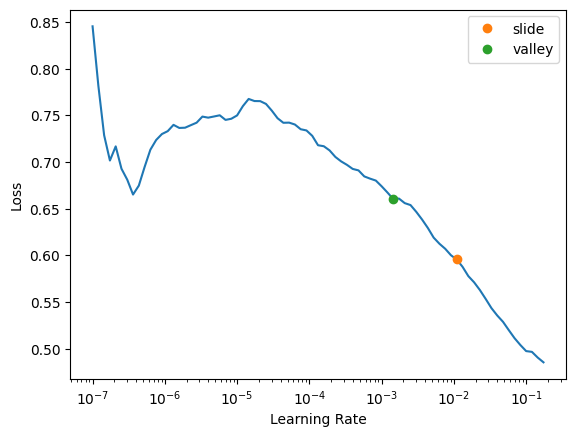

In [68]:
learn.lr_find(suggest_funcs=(slide, valley))

In [70]:
learn.fit(16, lr = 0.02)

epoch,train_loss,valid_loss,accuracy,time
0,0.054040,0.651568,0.510932,00:02
1,0.048327,9.362826,0.510932,00:02
2,0.051739,0.351055,0.510932,00:02
3,0.046359,4.625126,0.510932,00:02
4,0.046800,6.820189,0.510932,00:02
5,0.049039,72.921738,0.510932,00:02
6,0.045542,2.818169,0.510932,00:02
7,0.043590,5.528628,0.510932,00:02
8,0.043390,2.218006,0.510932,00:02
9,0.041413,32.119953,0.510932,00:02
